In [1]:
import h5py
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from tqdm import tqdm
from IPython import display
import matplotlib.animation as manimation
from matplotlib.animation import FuncAnimation
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams.update()

In [2]:
def loadData(filename):
    global kx,ky,kz,J00,J10,kspec,mspec,shells,n,q,T,beta,freeEnergy,Lx,Ly,Lz,dx,dy,dz,t,time,tF,timeF
    with h5py.File(filename,'r') as f:
        f.visit(print)
        kx = f["geometry/kx"][()]
        ky = f["geometry/ky"][()]
        kz = f["geometry/kz"][()]
        Lx = f["geometry/Lx"][()]
        Ly = f["geometry/Ly"][()]
        Lz = f["geometry/Lz"][()]
        dx = f["geometry/dx"][()]
        dy = f["geometry/dy"][()]
        dz = f["geometry/dz"][()]
        J00 = f["parameters/J00"][()]
        J10 = f["parameters/J10"][()]
        kspec = f["spectra/kSpec"][()]
        mspec = f["spectra/mSpec"][()]
        t = f["spectra/timestep"][()]
        time = f["spectra/time"][()]
        tF = f["freeEnergy/timestep"][()]
        timeF = f["freeEnergy/time"][()]
        freeEnergy = f["freeEnergy/freeEnergy"][()]
        shells = f["spectra/shells"][()]
        n = f["parameters/density"][()]
        q = f["parameters/charge"][()]
        T = f["parameters/temperature"][()]
        beta = f["parameters/beta"][()]
        
        

def loadFields(directory,timestep):
    global fields,fields_k
    fields  = {"A":[],"B":[],"phi":[]}
    fields_k = {"A":[],"B":[],"phi":[]}
    filename = os.path.join(directory,"fields.h5")
    with h5py.File(filename,'r') as f:
        #f.visit(print)
        for key in fields:
            fields[key] = f[f"{key}_r"][()]
            fields_k[key] = f[key][()]
        
def loadDistributions(directory,timestep):
    global distr,distr
    distr = {"hr":[], "h":[]}
    filename = os.path.join(directory, f"h_{timestep}.h5")
    with h5py.File(filename,'r') as f:
        for key in distr:
            distr[key] =  f[key][()]
            
def loadAll(directory,timestep):
    loadDistributions(directory,timestep)
    loadFields(directory,timestep)
    
def plotFields(z,t):
    fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',figsize=(15,15),tight_layout = True)
    labels = {"phi": f"$\phi$","A":"$A_{\parallel}$","B":"$B_{\parallel}$"}
    x = np.linspace(0,Lx,fields["phi"].shape[1])
    y = np.linspace(0,Ly,fields["phi"].shape[2])
    for ax,key in zip(axs,fields):
        ax.set_aspect('equal', 'box')
        pcm = ax.pcolormesh(fields[key][t,...,z],rasterized=True,shading = 'gouraud')#/np.amax(np.abs(fields[key][t,...,z]))
        ax.set_title(labels[key])
        ax.set_xlabel(r"$\rho_i$")
        ax.set_ylabel(r"$\rho_i$")
        # create an axes on the right side of ax. The width of cax will be 5%
        # of ax and the padding between cax and ax will be fixed at 0.05 inch.
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(pcm, cax=cax)
        #fig.colorbar(pcm, ax=ax)
    plt.show()
        
def plotDistributions(z,m,l,s):
    fig, axs = plt.subplots(1, 2, sharex='col', sharey='row',figsize=(15,15))
    for ax,key in zip(axs,distr):
        ax.set_aspect('equal', 'box')
        pcm = ax.pcolormesh(distr[key][...,z,m,l,s],rasterized=True)
        ax.set_title(key)
        # create an axes on the right side of ax. The width of cax will be 5%
        # of ax and the padding between cax and ax will be fixed at 0.05 inch.
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(pcm, cax=cax)
        #fig.colorbar(pcm, ax=ax)
        
def loadLocalFreeEnergy(directory,timestep):
    global free
    free = {"Wl" : []}
    for key in free:
        filename = os.path.join(directory, f"{key}_{timestep}.h5")
        with h5py.File(filename,'r') as f:
            free[key] = f["g"][()]


In [23]:
# path to simulation
projects_dir = ["ALLIANCE","memoryLeak","Alliance_alpha","fftw_many_mpi","Alliance_alpha_1.0"]
wrk_dir = "wrk"
chk_dir = "checkpoint"
sim_dir = ["nonlinear_growth","testfold","CFL"]
FIGURE_DIR = "fig"
HOME_PATH = "/home"
USERNAME = "gene"
PROJECTS_DIR = "CLionProjects"
PROJECT_DIR = projects_dir[0]
BASE_PATH = os.path.join(HOME_PATH,
                         USERNAME,
                         PROJECTS_DIR,
                         PROJECT_DIR,
                         wrk_dir,
                        sim_dir[-1])
FILENAME_PARAMETERS = os.path.join(BASE_PATH,"parameters.h5")

In [31]:
loadData(FILENAME_PARAMETERS)
loadFields(BASE_PATH,0)
loadDistributions(BASE_PATH,0)

freeEnergy
freeEnergy/freeEnergy
freeEnergy/time
freeEnergy/timestep
geometry
geometry/Lx
geometry/Ly
geometry/Lz
geometry/dx
geometry/dy
geometry/dz
geometry/kx
geometry/ky
geometry/kz
parameters
parameters/J00
parameters/J10
parameters/beta
parameters/charge
parameters/density
parameters/mass
parameters/temperature
spectra
spectra/kSpec
spectra/mSpec
spectra/shells
spectra/time
spectra/timestep


In [32]:
fields["A"].shape

(53, 64, 64, 18)

In [33]:
timeF

array([ 0.        ,  0.19632591,  0.38342262,  0.57104413,  0.76357276,
        0.96870622,  1.19385784,  1.40241824,  1.60813571,  1.81736964,
        2.04269663,  2.27247091,  2.48399166,  2.68932746,  2.90016799,
        3.12905962,  3.35046596,  3.55726665,  3.76064682,  3.97077518,
        4.20007163,  4.41898937,  4.62434146,  4.8292256 ,  5.04352408,
        5.27624933,  5.4894035 ,  5.69101513,  5.8933859 ,  6.10443789,
        6.33040702,  6.55088621,  6.76197268,  6.97078006,  7.1897711 ,
        7.42453644,  7.64735193,  7.85673767,  8.06581838,  8.28657908,
        8.51603006,  8.72140795,  8.91881475,  9.11963341,  9.33081673,
        9.55850152,  9.77120869,  9.97486824, 10.18244404, 10.40362766,
       10.63933815, 10.85284713, 11.05844527])

In [34]:
0.38+0.04

0.42

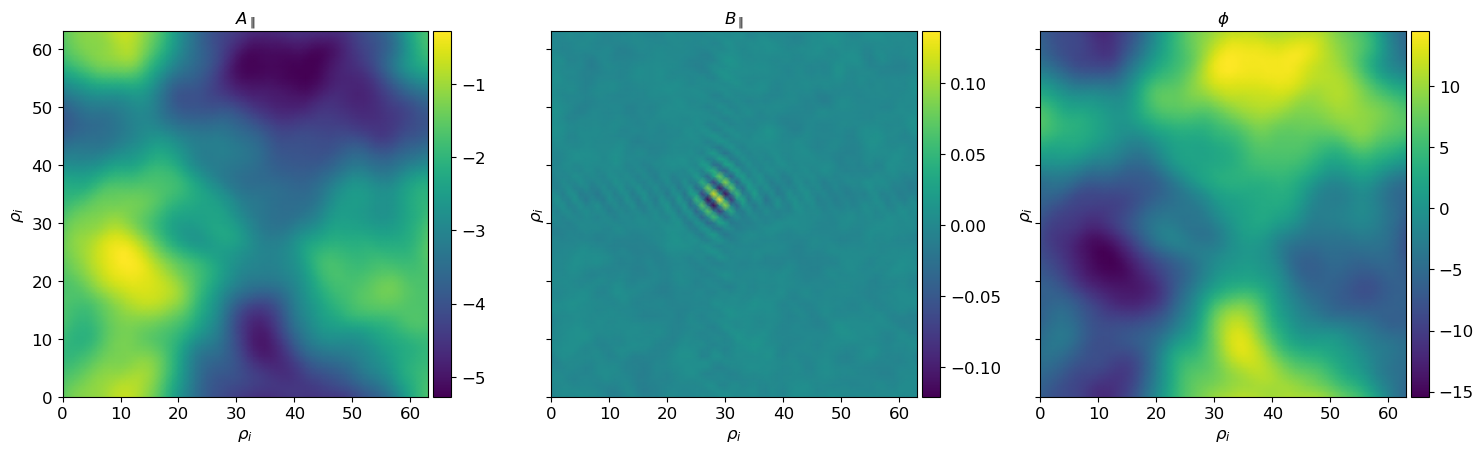

In [70]:
#t = 2000
loadFields(BASE_PATH,t)
plotFields(15,449)

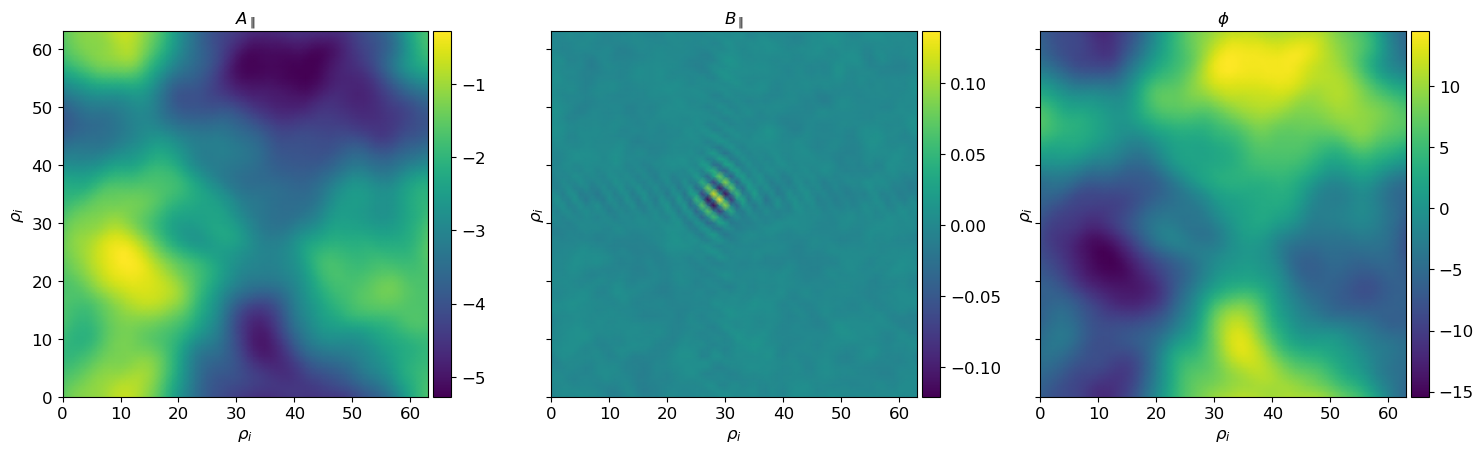

In [71]:
plotFields(15,449)

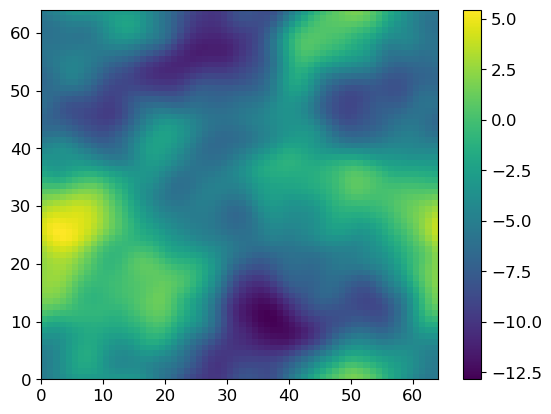

In [43]:

plt.figure()
plt.pcolormesh(distr["hr"][...,0,0,0,0])
plt.colorbar()
plt.show()

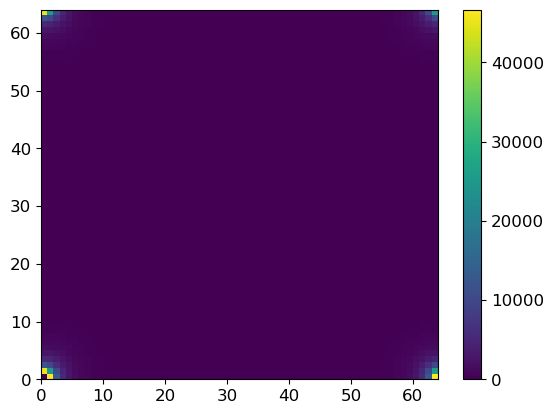

In [46]:
plt.pcolormesh(np.abs(distr["h"][...,0,0,0,0]))
plt.colorbar()
plt.show()

In [58]:
np.sum(fields["phi"][0,...])

4.6566128730773926e-09

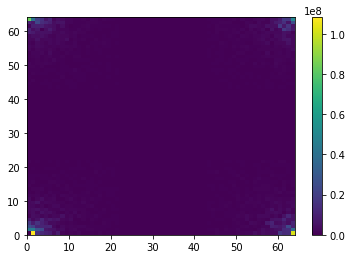

In [125]:
plt.pcolormesh(np.abs(fields_k["phi"][-1,...,3]))#,shading = 'gouraud')
plt.colorbar()

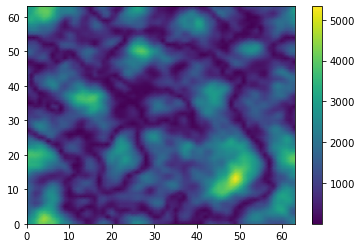

In [131]:
plt.pcolormesh(np.abs(fields["A"][-1,...,0]),shading = 'gouraud')
plt.colorbar()

In [61]:
pcms = []
fig, axs = plt.subplots(1, 3, sharex='col', sharey='row',figsize=(15,5),tight_layout = True)
labels = {"phi": f"$\phi$","A":"$A_{\parallel}$","B":"$B_{\parallel}$"}
x = np.linspace(0,Lx,fields["phi"].shape[0])
y = np.linspace(0,Ly,fields["phi"].shape[1])
for ax,key in zip(axs,fields):
    ax.set_aspect('equal', 'box')
    pcm = ax.pcolormesh(fields[key][0,...,0]/np.amax(np.abs(fields[key][0,...,0])),rasterized=True,vmin = -1,vmax = 1,shading = 'gouraud')
    ax.set_title(labels[key])
    ax.set_xlabel(r"$\rho_i$")
    ax.set_ylabel(r"$\rho_i$")
    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(pcm, cax=cax)
    pcms.append(pcm)

In [155]:
def animate_fields(i):
    loadFields(BASE_PATH,i)
    for pcm,key in zip(pcms,fields):
        data = fields[key][i,...,0]/np.amax(np.abs(fields[key][i,...,0]))
        pcm.set_array(data.flatten())
        

In [158]:
fr = np.arange(0,fields["phi"].shape[0],100)

In [159]:
fr.shape

(25,)

In [160]:
anim = FuncAnimation(fig, animate_fields, interval=100, frames=fr)
anim.save('fields_new.gif')

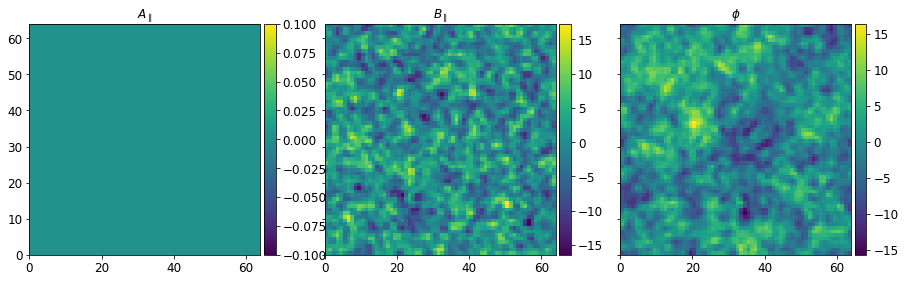

In [26]:
t = 2000
loadFields(BASE_PATH,t)
plotFields(7)

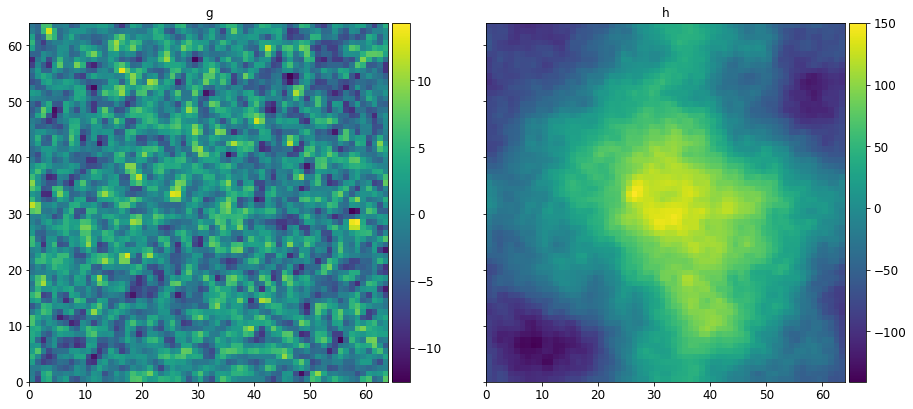

In [202]:
t = 2000
loadDistributions(BASE_PATH,t)
plotDistributions(0,0,0,0)

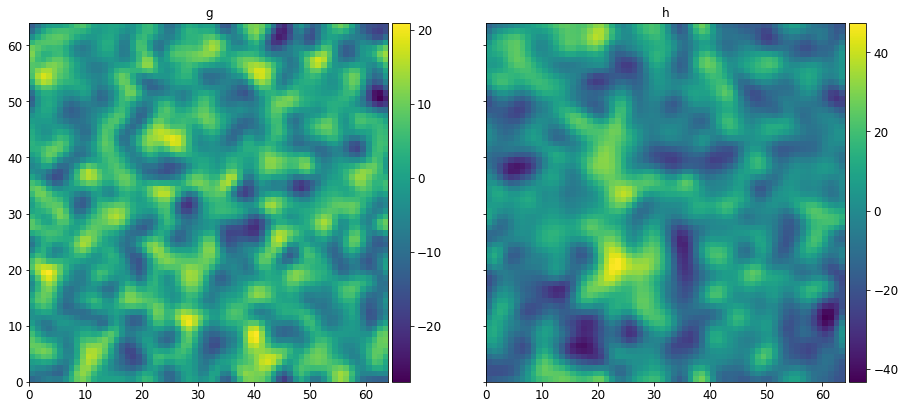

In [203]:
t = 40
loadDistributions(BASE_PATH,t)
plotDistributions(0,0,0,0)

/tmp/ipykernel_4023/3849285753.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcm = ax.pcolormesh(x,y,distr["h"][...,0,0,0,0]/np.amax(np.abs(distr["h"][...,0,0,0,0])),rasterized=True,vmax = 1, vmin = -1)


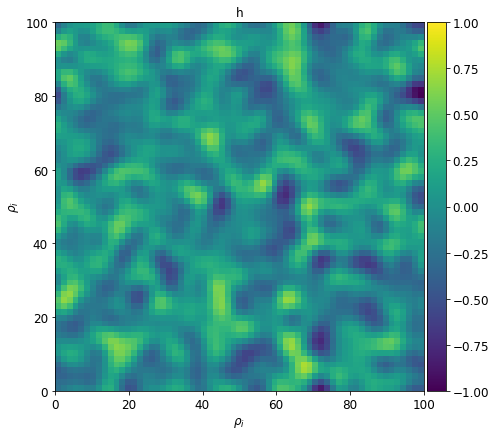

In [219]:
loadDistributions(BASE_PATH,0)
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(7,7))
ax.set_aspect('equal', 'box')
pcm = ax.pcolormesh(x,y,distr["h"][...,0,0,0,0]/np.amax(np.abs(distr["h"][...,0,0,0,0])),rasterized=True,vmax = 1, vmin = -1)
ax.set_title("h")
ax.set_xlabel(r"$\rho_i$")
ax.set_ylabel(r"$\rho_i$")
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(pcm, cax=cax)
#fig.colorbar(pcm, ax=ax)

In [220]:
def animate_h(i):
    loadDistributions(BASE_PATH,i)
    data = distr["h"][...,0,0,0,0]/np.amax(np.abs(distr["h"][...,0,0,0,0]))
    pcm.set_array(data.flatten())
        

In [221]:
anim = FuncAnimation(fig, animate_h, interval=100, frames=fr)
anim.save('h.gif')

In [36]:
distr["g"][...,1,:,:]

array([[[[[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         ...,

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]]],


        [[[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         ...,

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]]],


        [[[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         ...,

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]]],


        ...,


        [[[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.]],

         ...,

         [[0., 0.],
          [0., 0.

In [108]:
freeEnergy2D[60,0,4,0,1,0]

(-38532.138776201-382586.45928240794j)

In [109]:
freeEnergy[0]

299764839931.7648

In [110]:
2* np.real(np.sum(distr_k["g"] * np.conj(distr_k["h"])))

299955992752.6049

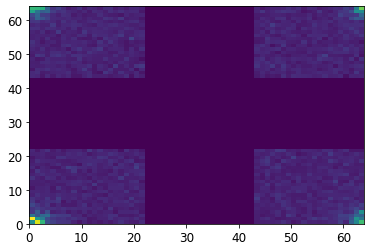

In [111]:

plt.pcolormesh(np.sum(np.abs(freeEnergy2D),axis = (2,3,4,5)))

In [ ]:
kx[32]

In [73]:
def checkReality(h):
    # checking f(kx,ky,0) = f*(-kx,-ky,0)
    arPl = h[1:h.shape[0]//2, 1:h.shape[1]//2, 0, ...]
    arMn = h[h.shape[0]//2+1:, h.shape[1]//2+1:, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,::-1,...]))
    
    #checking f(0,ky,0) = f*(0,-ky,0)
    arPl = h[0, 1:h.shape[1]//2, 0, ...]
    arMn = h[0, h.shape[1]//2+1:, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,...]))
    
    #checking f(kx,0,0) = f*(-kx,0,0)
    arPl = h[1:h.shape[0]//2, 0, 0, ...]
    arMn = h[h.shape[0]//2+1:, 0, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,...]))

In [11]:
checkReality(distr_k["g"])

NameError: name 'checkReality' is not defined

In [12]:
plt.pcolormesh(np.abs(freeEnergy[:,:,0,0,0,0]))
#plt.clim([0,1])

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [13]:
freeEnergy.shape

(3,)

In [14]:
np.where(np.abs(freeEnergy) == np.amax(np.abs(freeEnergy[...,0,0,0])))

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [15]:
freeEnergy[2,59,6,0,0,0]

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [16]:
freeEnergy[32,0,0,3,0,0]

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [17]:
kx[8]

0.5026548245743669

In [18]:
freeEnergy[126,3,0,0,0,0]

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [19]:
for i in range(freeEnergy.shape[3]):
    print(f"m = {i}")
    print(f"kx = {np.where(np.abs(freeEnergy) == np.amax(np.abs(freeEnergy[...,i,0,0])))[0]}")
    print(f"ky = {np.where(np.abs(freeEnergy) == np.amax(np.abs(freeEnergy[...,i,0,0])))[1]}")
    print(f"kz = {np.where(np.abs(freeEnergy) == np.amax(np.abs(freeEnergy[...,i,0,0])))[2]}")

IndexError: tuple index out of range

In [20]:
checkReality(distr_k["g"])

NameError: name 'checkReality' is not defined

In [21]:
64/4

16.0

In [22]:
freeEnergy[16,0,0,12,1,1]

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [23]:
freeEnergy[48,0,0,13,1,1]

IndexError: too many indices for array: array is 1-dimensional, but 6 were indexed

In [24]:
freeEnergy.shape

(3,)

In [25]:
kspec.shape

(3, 100)

In [134]:
np.amax(np.sqrt((kx**2+ky**2)))

1.4217225402106772

In [147]:
kspec.shape

(26, 40)

In [22]:
np.amax(np.sqrt(kx**2+ky**2))

2.8434450804213545

In [46]:
np.amax(kx)

2.0106192982974678

In [13]:
kspec.shape

(11, 30)

freeEnergy
freeEnergy/freeEnergy
freeEnergy/time
freeEnergy/timestep
geometry
geometry/Lx
geometry/Ly
geometry/Lz
geometry/dx
geometry/dy
geometry/dz
geometry/kx
geometry/ky
geometry/kz
parameters
parameters/J00
parameters/J10
parameters/beta
parameters/charge
parameters/density
parameters/mass
parameters/temperature
spectra
spectra/kSpec
spectra/mSpec
spectra/shells
spectra/time
spectra/timestep


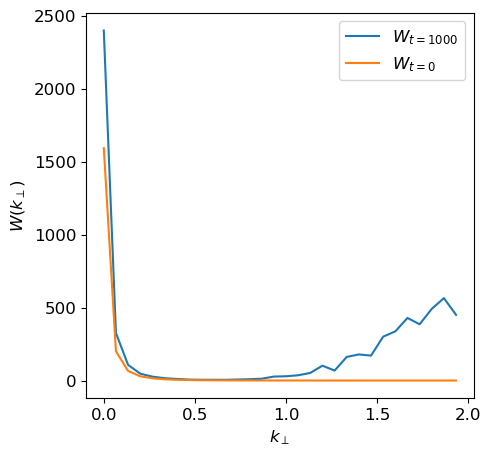

In [73]:
import matplotlib
fontsize = 12
matplotlib.rcParams.update({'font.size': fontsize})
matplotlib.rc('axes', titlesize=fontsize)
loadData(FILENAME_PARAMETERS)
plt.figure(figsize = (5,5))
plt.plot(shells,kspec[446,:],label=r"$W_{t = 1000}$")
#plt.plot(shells,kspec[56,:],label=r"$W_{t = 1000}$")
plt.plot(shells,kspec[0,:],label=r"$W_{t = 0}$")
#plt.loglog(shells[1:], 6e6*shells[1:]**(-2/2),linestyle = "--",color = "k", label = r"$\frac{1}{k}$")
#plt.ylim([0.1*np.amax(kspec),1.1*np.amax(kspec)])
#plt.xlim([0.1,shells[-1]])
plt.xlabel(f"$k_\perp$")
plt.ylabel(f"$W(k_\perp)$")
plt.legend()
plt.show()
#plt.savefig("kSpec.eps")

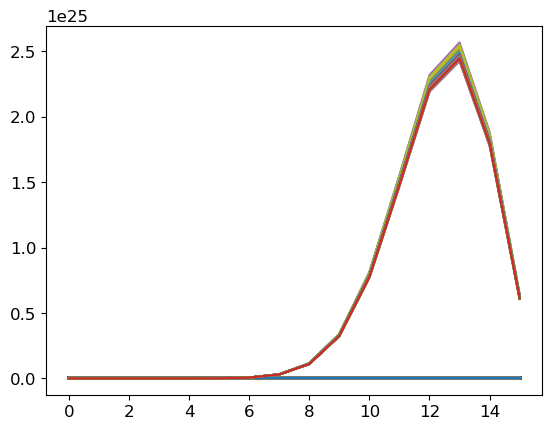

In [74]:
for i in range(mspec.shape[0]):
    plt.plot(mspec[i,:])
plt.show()

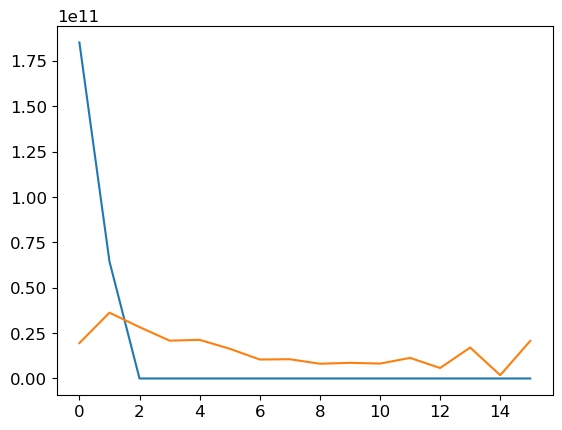

In [79]:
plt.plot(mspec[0,:])
plt.plot(mspec[446,:])
plt.show()

In [39]:
def plotKspec():
    fig, ax = plt.subplots(1,1,figsize = (5,5))
    ax.set_ylim([0.01*np.amax(kspec),1.1*np.amax(kspec)])
    ax.set_xlim([0.1,shells[-1]])
    line, = ax.plot([])
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_xlabel(f"$k_\perp$")
    ax.set_ylabel(f"$W(k_\perp)$")
    plt.tight_layout()

    return fig, line

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '360x360', '-pix_fmt', 'rgba', '-r', '0.4163197335553705', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmphkqvn63d/temp.m4v']' returned non-zero exit status 255.

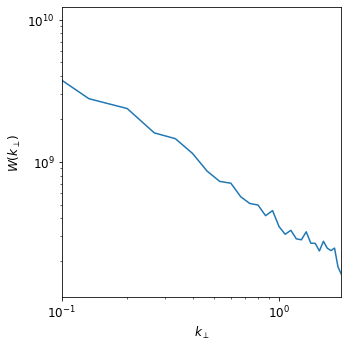

In [144]:
fig,line = plotKspec()

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
def animate(frame_num,data):
    line.set_data((shells,data[frame_num,:]))
    return line
anim = FuncAnimation(fig, animate, frames=kspec.shape[0], interval=kspec.shape[0],fargs = [kspec])
#anim = FuncAnimation(fig, animate, frames=10, interval=10)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
#plt.close()   

In [195]:
def write_TriptichMovie(filename):
    MOVIE_NAME = os.path.join(filename)
    FFMpegWriter = manimation.writers['ffmpeg']
    metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
    writer = FFMpegWriter(fps=15, metadata=metadata)

    with writer.saving(fig, MOVIE_NAME, kspec.shape[0]):
        for i in range(100):
            animate(i,kspec)
            writer.grab_frame()

In [196]:
write_TriptichMovie("kSpecNonlEquil.mp4")

In [113]:
kx

array([ 0.        ,  0.06283185,  0.12566371,  0.18849556,  0.25132741,
        0.31415927,  0.37699112,  0.43982297,  0.50265482,  0.56548668,
        0.62831853,  0.69115038,  0.75398224,  0.81681409,  0.87964594,
        0.9424778 ,  1.00530965,  1.0681415 ,  1.13097336,  1.19380521,
        1.25663706,  1.31946891,  1.38230077,  1.44513262,  1.50796447,
        1.57079633,  1.63362818,  1.69646003,  1.75929189,  1.82212374,
        1.88495559,  1.94778745,  2.0106193 , -1.94778745, -1.88495559,
       -1.82212374, -1.75929189, -1.69646003, -1.63362818, -1.57079633,
       -1.50796447, -1.44513262, -1.38230077, -1.31946891, -1.25663706,
       -1.19380521, -1.13097336, -1.0681415 , -1.00530965, -0.9424778 ,
       -0.87964594, -0.81681409, -0.75398224, -0.69115038, -0.62831853,
       -0.56548668, -0.50265482, -0.43982297, -0.37699112, -0.31415927,
       -0.25132741, -0.18849556, -0.12566371, -0.06283185])

In [ ]:
np.where(kspec == np.amax(kspec))

In [ ]:
np.sqrt(np.amax(kx)**2 + np.amax(ky)**2)

In [ ]:
np.sqrt(2*kx[8]**2)

In [ ]:
plt.plot(mspec[6,:])
plt.plot(mspec[0,:])

In [44]:
freeEnergy[100]/freeEnergy[0]

1.002913349294741

In [163]:
freeEnergy[-1]

1141870390365984.5

In [166]:
freeEnergy[-1]

92913529075971.03

In [45]:
(freeEnergy[50]-freeEnergy[40])/freeEnergy[40]

0.00037961607763349376

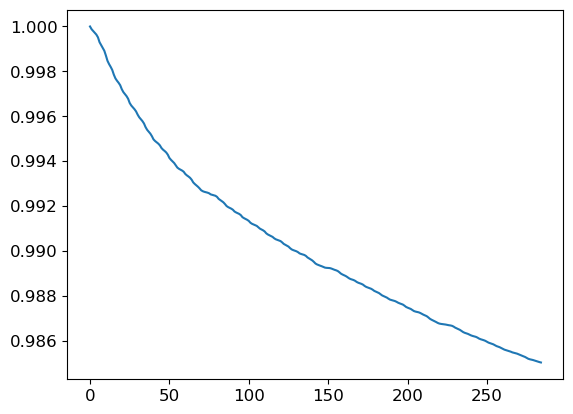

In [59]:
plt.plot(freeEnergy/freeEnergy[0])
plt.show()

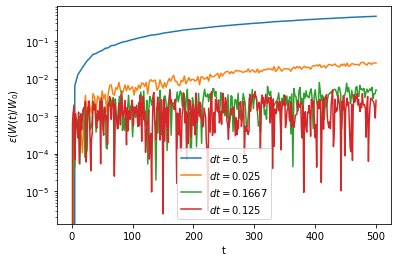

In [41]:
dt = [0.0625, 0.0833, 0.125,0.1667,0.25,0.5]

plt.plot(dt[5] * np.arange(freeEnergy05.shape[0])*10,
         (np.abs(freeEnergy05[:]-freeEnergy05[0])/freeEnergy05[0]),label = r"$dt = 0.5$")
plt.plot(dt[4] * np.arange(freeEnergy025.shape[0])*10,
         (np.abs(freeEnergy025[:]-freeEnergy025[0])/freeEnergy025[0]),label = r"$dt = 0.025$")
plt.plot(dt[3] * np.arange(freeEnergy0166.shape[0])*10,
         (np.abs(freeEnergy0166[:]-freeEnergy0166[0])/freeEnergy0166[0]),label = r"$dt = 0.1667$")
plt.plot(dt[2] * np.arange(freeEnergy0125.shape[0])*10,
         (np.abs(freeEnergy0125[:]-freeEnergy0125[0])/freeEnergy0125[0]),label = r"$dt = 0.125$")
#plt.plot(dt[1] * np.arange(freeEnergy0833.shape[0])*10,
#         np.abs(freeEnergy0833[:]-freeEnergy0833[0])/freeEnergy0833[0],label = "dt = 0.0833")
#plt.plot(dt[0] * np.arange(freeEnergy0625.shape[0])*10,
#         np.abs(freeEnergy0625[:]-freeEnergy0625[0])/freeEnergy0625[0],label = "dt = 0.0625")

plt.xlabel(r"t")
plt.ylabel(r"$\epsilon(W(t)/W_{0})$")
plt.yscale("log")
plt.legend()
plt.savefig("freeEnergyErrorNonl.pdf",bbox_inches='tight')

In [13]:
err0625 = np.abs(freeEnergy0625[:]-freeEnergy0625[0])/freeEnergy0625[0]
err0833 = np.abs(freeEnergy0833[:]-freeEnergy0833[0])/freeEnergy0833[0]
err0125 = np.abs(freeEnergy0125[:]-freeEnergy0125[0])/freeEnergy0125[0]
err0166 = (np.abs(freeEnergy0166[:]-freeEnergy0166[0])/freeEnergy0166[0])
err025 = np.abs(freeEnergy025[:]-freeEnergy025[0])/freeEnergy025[0]
err05 = np.abs(freeEnergy05[:]-freeEnergy05[0])/freeEnergy05[0]
errAr = ([err0625,err0833,err0125,err0166,err025,err05])

In [14]:
errAr.shape

AttributeError: 'list' object has no attribute 'shape'

In [15]:
def meanError(energy, Nt):
    return np.mean(energy[-Nt:])
meanErr = []
for i,dt_i in enumerate(dt):
    nt =  int(dt[-1]/dt_i * 20)
    meanErr.append(meanError(errAr[i],nt))

In [16]:
meanErr

[0.0011944579440845396,
 0.0014915484457153517,
 0.0019119471113352201,
 0.004140204156427679,
 0.02363464612896965,
 0.4260453527700583]

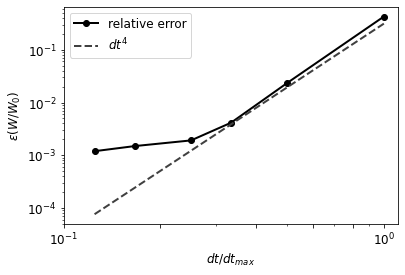

In [58]:
import matplotlib
fontsize = 12
matplotlib.rcParams.update({'font.size': fontsize})
matplotlib.rc('axes', titlesize=fontsize)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale('log')
ax.set_yscale('log')

from matplotlib.ticker import ScalarFormatter
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.loglog(np.array(dt[:])/dt[-1],meanErr,color = 'k',linewidth = 2,marker = "o",label = "relative error")
plt.xlabel(r"$dt/dt_{max}$")
plt.ylabel(r"$\epsilon(W/W_{0})$")
ax.plot(np.array(dt)/dt[-1],5*(np.array(dt))**(4),linestyle = '--',color = [0.25,0.25,0.25],linewidth = 2,label = f"$dt^4$")
#plt.xlim([0.1,1])
ax.set_xticks([0.1,0.2,0.4,0.6,0.8,1])
#plt.xticks([0.1,0.2,0.4,0.6,1])
plt.legend()
plt.savefig("relErrorFromTimeStep.pdf",bbox_inches='tight')

In [12]:
(np.abs(freeEnergy0166[-1]-freeEnergy0166[0])/freeEnergy0166[0])

0.00504451846650117

In [13]:
np.abs((freeEnergy0125[-1]-freeEnergy0125[0])/freeEnergy0125[0])

0.0026703138358960656

In [163]:
err = np.mean((np.abs(freeEnergy0125[-40:]-freeEnergy0125[0])/freeEnergy0125[0]))

In [164]:
err

0.002035098506287877

In [161]:
freeEnDif =


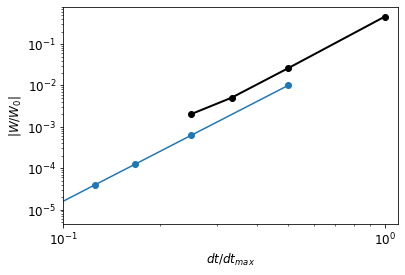

In [165]:
plt.loglog(np.array(dt[1:])/dt[-1],freeEnDif,color = 'k',linewidth = 2,marker = "o")
plt.xlabel(r"$dt/dt_{max}$")
plt.ylabel(r"$|W/W_0|$")
plt.plot(dt,0.01*(np.array(dt)/dt[-1])**(4),marker = "o")
plt.xlim([0.1,1.1])
plt.savefig("relErrorFromTimeStep.eps",bbox_inches='tight')

In [29]:
freeEnergy.shape

(21,)

In [5]:
with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/dt0_5.h5",'r') as f:
    freeEnergy05 = f["freeEnergy/freeEnergy"][()]
with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/dt0_25.h5",'r') as f:
    freeEnergy025 = f["freeEnergy/freeEnergy"][()]
with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/dt0_125.h5",'r') as f:
    freeEnergy0125 = f["freeEnergy/freeEnergy"][()]
with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/dt0_1667.h5",'r') as f:
    freeEnergy0166 = f["freeEnergy/freeEnergy"][()]
with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/dt0_0833.h5",'r') as f:
    freeEnergy0833 = f["freeEnergy/freeEnergy"][()]
with h5py.File("/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/dt0_0625.h5",'r') as f:
    freeEnergy0625 = f["freeEnergy/freeEnergy"][()]

In [21]:
np.where((freeEnergy[:]-freeEnergy[0])/freeEnergy[0] == np.amin((freeEnergy[:]-freeEnergy[0])/freeEnergy[0]))

(array([4]),)

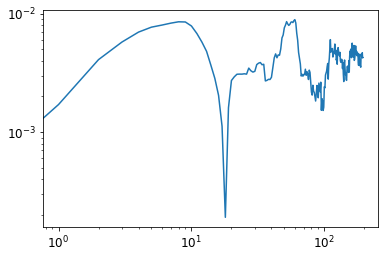

In [72]:
plt.loglog(np.abs(freeEnergy-freeEnergy[0])/freeEnergy[0])


/tmp/ipykernel_4006/2393705415.py:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(np.sqrt(k**4 * np.exp(-2 * k**2)/k**2))


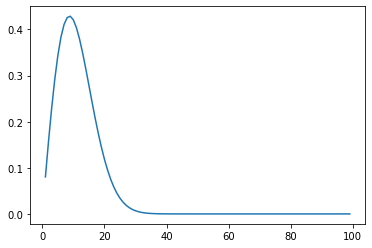

In [704]:
k = np.linspace(0.000000,8,100)
plt.plot(np.sqrt(k**4 * np.exp(-2 * k**2)/k**2))

In [119]:
loadLocalFreeEnergy(BASE_PATH,0)

In [153]:
ksq = np.sqrt(np.amax(kx**2+ky**2 + kz**2))

ValueError: operands could not be broadcast together with shapes (64,) (9,) 

<ipython-input-58-f968a3b88ee4>:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(kx,ky,np.abs(fields_k["B"][0,...,2]))


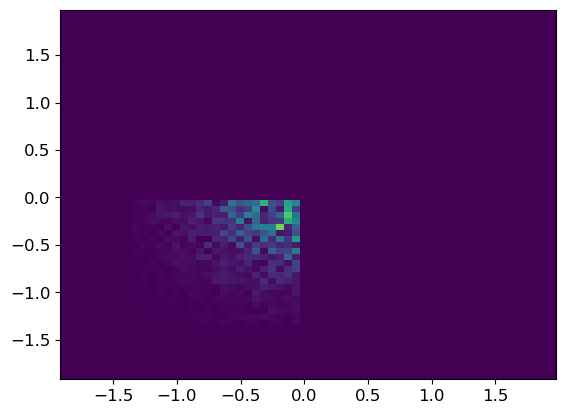

In [58]:
plt.pcolormesh(kx,ky,np.abs(fields_k["B"][0,...,2]))
plt.show()

# FIELDS

In [113]:
def getPhi(g):
    phi = np.zeros((kx.size,ky.size,kz.size),dtype = np.complex128)
    b = 1. + beta * np.sum((n*T)[None,None,:] * J10**2,axis = 2)
    c = np.sum((q*n)[None,None,:] * J10 * J00, axis = 2)
    a = np.sum((q**2 * n / T)[None,None,:] * (1 - J00**2), axis = 2)
    Iphi = np.sum((q * n)[None,None,None,:] * J00[:,:,None,:] * g[:,:,:,0,0,:], axis = 3)
    Ib = np.sum((n * T)[None,None,None,:] * J10[:,:,None,:] * (g[:,:,:,0,0,:] + g[:,:,:,0,1,:]),axis = 3)
    denom = (2 * a * b +beta * c**2)
    mask = (denom > 1e-16)
    print(mask.shape)
    print(phi[mask].shape)
    phi[mask,:] = (2 * b[mask,None] * Iphi[mask,:] - beta * c[mask,None] * Ib[mask,:])/denom[mask,None]
    return phi


def getPhiFromH(h):
    pass

In [114]:
phi = getPhi(distr_k["g"])

(64, 64)
(4095, 9)


In [115]:
np.allclose(phi,fields_k["phi"])

False

In [177]:
class Solution:
    def removeElement(self, nums: list[int], val: int) -> int:
        k = len(nums)
        print(k)
        l = -1
        for i in range(len(nums)):
            p1 = nums[i]
            l = -i-1
            p2 = nums[l]
            while p2 == val:
                l -= 1
                print(l)
                p2 = nums[l]
                print(f"p2 = {p2}")
                
            if p1 == val:
                nums[i] = copy.copy(p2)
                p2 = nums[i]
                k-=1
            print(nums)
            
        return k

In [178]:
[0,1,2,2,3,0,4,2]
2


2

In [179]:
sol = Solution

In [180]:
sol.removeElement(sol,nums = [0,1,2,2,3,0,4,2],val = 2)

8
-2
p2 = 4
[0, 1, 2, 2, 3, 0, 4, 2]
[0, 1, 2, 2, 3, 0, 4, 2]


NameError: name 'copy' is not defined

# scratchspace

In [260]:
filename = f"/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/test_real_cond_0.h5"
with h5py.File(filename,'r') as f:
    h0 = f["g"][()]

filename = f"/home/alcauchy/CLionProjects/Alliance_alpha_1.0/wrk/testfold/test_real_cond_1.h5"
with h5py.File(filename,'r') as f:
    h1 = f["g"][()]


In [261]:
h0z = h0[:,0,0,:,:,:]
h1z = h1[:,0,0,:,:,:]
h0zp = h0[1:h0.shape[0]//2,0,0,...]
h0zm= h1[h0.shape[0]//2+1:,0,0,...]


In [262]:
np.allclose(h0zp[::-1,...],np.conj(h0zm))

True

In [263]:
k = 16
h0z[k,1,0,0]

(-233.63620607831004-397.79775816613j)

In [264]:
np.conj(h1z[64-k,1,0,0])

(-233.63620607831004-397.79775816613j)

In [265]:
h1z[k,0,0,0]

(-437.06148496314717-147.66919636293173j)

In [266]:
checkReality(h0,h1)

True
True
True


In [267]:
kx[33]

-1.9477874452256718

In [268]:
kx[32]

2.0106192982974678

In [269]:
kxInd = 32
kyInd = 1
m = 0
print(h1[kxInd,kyInd,0,m,0,0])
print(h1[-kxInd,-kyInd,0,m,0,0])
print(h1[kxInd,-kyInd,0,m,0,0])
print(h1[-kxInd,kyInd,0,m,0,0])


(-0.00458175415887106-0.0017743471626558477j)
(0.004377371765894963+0.002231455903463639j)
(0.004377371765894963+0.002231455903463639j)
(-0.00458175415887106-0.0017743471626558477j)


In [270]:
print(h0[kxInd,kyInd,0,m,0,0])
print(h0[-kxInd,-kyInd,0,m,0,0])
print(h0[kxInd,-kyInd,0,m,0,0])
print(h0[-kxInd,kyInd,0,m,0,0])



(-0.00458175415887106-0.0017743471626558477j)
(0.004377371765894963+0.002231455903463639j)
(0.004377371765894963+0.002231455903463639j)
(-0.00458175415887106-0.0017743471626558477j)


In [92]:
def checkReality(h0,h1):
    # checking f(kx,ky,0) = f*(-kx,-ky,0)
    arPl = h0[1:h0.shape[0]//2, 1:, 0, ...]
    arMn = h1[h1.shape[0]//2+1:, 1:, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,::-1,...]))
    
    #checking f(0,ky,0) = f*(0,-ky,0)
    arPl = h0[0, 1:h0.shape[1]//2, 0, ...]
    arMn = h1[0, h1.shape[1]//2+1:, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,...]))
    
    #checking f(kx,0,0) = f*(-kx,0,0)
    arPl = h0[1:h0.shape[0]//2, 0, 0, ...]
    arMn = h1[h1.shape[0]//2+1:, 0, 0, ...]
    print(np.allclose(arPl,np.conj(arMn)[::-1,...]))

In [11]:
kperp = np.sqrt(kx[:,None]**2 + ky[None,:]**2)

In [13]:
spec = kperp**2 * np.exp(-2 * kperp**2/0.5**2)

In [14]:
plt.pcolormesh(spec)
plt.colorbar()

In [15]:
np.amax(np.abs(kx))

2.0106192982974678

In [16]:
1/kperp

<ipython-input-16-e8350f6f92bc>:1: RuntimeWarning: divide by zero encountered in true_divide
  1/kperp


array([[        inf, 15.91549431,  7.95774715, ...,  5.30516477,
         7.95774715, 15.91549431],
       [15.91549431, 11.25395395,  7.11762543, ...,  5.03292121,
         7.11762543, 11.25395395],
       [ 7.95774715,  7.11762543,  5.62697698, ...,  4.41416391,
         5.62697698,  7.11762543],
       ...,
       [ 5.30516477,  5.03292121,  4.41416391, ...,  3.75131798,
         4.41416391,  5.03292121],
       [ 7.95774715,  7.11762543,  5.62697698, ...,  4.41416391,
         5.62697698,  7.11762543],
       [15.91549431, 11.25395395,  7.11762543, ...,  5.03292121,
         7.11762543, 11.25395395]])

In [18]:
1/(1-J00)

<ipython-input-18-3a6c6f79a237>:1: RuntimeWarning: divide by zero encountered in true_divide
  1/(1-J00)


array([[[           inf,            inf],
        [1.86025743e+06, 1.01371192e+03],
        [4.65064733e+05, 2.53803288e+02],
        ...,
        [2.06695715e+05, 1.13079833e+02],
        [4.65064733e+05, 2.53803288e+02],
        [1.86025743e+06, 1.01371192e+03]],

       [[1.86025743e+06, 1.01371192e+03],
        [9.30128966e+05, 5.07106083e+02],
        [3.72051886e+05, 2.03142779e+02],
        ...,
        [1.86026193e+05, 1.01822006e+02],
        [3.72051886e+05, 2.03142779e+02],
        [9.30128966e+05, 5.07106083e+02]],

       [[4.65064733e+05, 2.53803288e+02],
        [3.72051886e+05, 2.03142779e+02],
        [2.32532616e+05, 1.27152138e+02],
        ...,
        [1.43097187e+05, 7.84404412e+01],
        [2.32532616e+05, 1.27152138e+02],
        [3.72051886e+05, 2.03142779e+02]],

       ...,

       [[2.06695715e+05, 1.13079833e+02],
        [1.86026193e+05, 1.01822006e+02],
        [1.43097187e+05, 7.84404412e+01],
        ...,
        [1.03348107e+05, 5.67910269e+01],
     

In [19]:
1-J00

array([[[0.00000000e+00, 0.00000000e+00],
        [5.37560008e-07, 9.86473555e-04],
        [2.15023830e-06, 3.94005928e-03],
        ...,
        [4.83802967e-06, 8.84330983e-03],
        [2.15023830e-06, 3.94005928e-03],
        [5.37560008e-07, 9.86473555e-04]],

       [[5.37560008e-07, 9.86473555e-04],
        [1.07511973e-06, 1.97197398e-03],
        [2.68779715e-06, 4.92264607e-03],
        ...,
        [5.37558708e-06, 9.82105969e-03],
        [2.68779715e-06, 4.92264607e-03],
        [1.07511973e-06, 1.97197398e-03]],

       [[2.15023830e-06, 3.94005928e-03],
        [2.68779715e-06, 4.92264607e-03],
        [4.30047197e-06, 7.86459449e-03],
        ...,
        [6.98825757e-06, 1.27485259e-02],
        [4.30047197e-06, 7.86459449e-03],
        [2.68779715e-06, 4.92264607e-03]],

       ...,

       [[4.83802967e-06, 8.84330983e-03],
        [5.37558708e-06, 9.82105969e-03],
        [6.98825757e-06, 1.27485259e-02],
        ...,
        [9.67603593e-06, 1.76084155e-02],
     

In [53]:
kx

array([ 0.        ,  0.06283185,  0.12566371,  0.18849556,  0.25132741,
        0.31415927,  0.37699112,  0.43982297,  0.50265482,  0.56548668,
        0.62831853,  0.69115038,  0.75398224,  0.81681409,  0.87964594,
        0.9424778 ,  1.00530965,  1.0681415 ,  1.13097336,  1.19380521,
        1.25663706,  1.31946891,  1.38230077,  1.44513262,  1.50796447,
        1.57079633,  1.63362818,  1.69646003,  1.75929189,  1.82212374,
        1.88495559,  1.94778745,  2.0106193 , -1.94778745, -1.88495559,
       -1.82212374, -1.75929189, -1.69646003, -1.63362818, -1.57079633,
       -1.50796447, -1.44513262, -1.38230077, -1.31946891, -1.25663706,
       -1.19380521, -1.13097336, -1.0681415 , -1.00530965, -0.9424778 ,
       -0.87964594, -0.81681409, -0.75398224, -0.69115038, -0.62831853,
       -0.56548668, -0.50265482, -0.43982297, -0.37699112, -0.31415927,
       -0.25132741, -0.18849556, -0.12566371, -0.06283185])

In [54]:
ky

array([ 0.        ,  0.06283185,  0.12566371,  0.18849556,  0.25132741,
        0.31415927,  0.37699112,  0.43982297,  0.50265482,  0.56548668,
        0.62831853,  0.69115038,  0.75398224,  0.81681409,  0.87964594,
        0.9424778 ,  1.00530965,  1.0681415 ,  1.13097336,  1.19380521,
        1.25663706,  1.31946891,  1.38230077,  1.44513262,  1.50796447,
        1.57079633,  1.63362818,  1.69646003,  1.75929189,  1.82212374,
        1.88495559,  1.94778745,  2.0106193 , -1.94778745, -1.88495559,
       -1.82212374, -1.75929189, -1.69646003, -1.63362818, -1.57079633,
       -1.50796447, -1.44513262, -1.38230077, -1.31946891, -1.25663706,
       -1.19380521, -1.13097336, -1.0681415 , -1.00530965, -0.9424778 ,
       -0.87964594, -0.81681409, -0.75398224, -0.69115038, -0.62831853,
       -0.56548668, -0.50265482, -0.43982297, -0.37699112, -0.31415927,
       -0.25132741, -0.18849556, -0.12566371, -0.06283185])

In [55]:
kz

array([0.        , 0.06283185, 0.12566371, 0.18849556, 0.25132741,
       0.31415927, 0.37699112, 0.43982297, 0.50265482])